# Teste de Hipótese com Análise Exploratória de Dados:
### Série Histórica: Stockholm
---
## Serve para confirmar ou negar uma premissa utilizando uma amostra com relação a média de uma população.
* H0: hipótese nula
* Ha: hipótese lternativa
### Alfa e Valor - P
* α = 0,05 ou 0,01
* valor-p >= α: não rejeita H0
* valor-p <= α: rejeita H0
### Etapas:
1. Definir o tamnho da amostra;
2. Coletar os dados;
3. Calcular a média e o desvio pdrão;
4. Definir as duas hipóteses: H0 e Ha;
5. Definir o α;
6. Padronizar os dados gerando a estatístic de teste;
7. Encontrar o valor-p n tbela Z;
8. Comparar com o α;
9. Emitir o resultado do teste.
### Erros:
* tipo 1: rejeitar H0 quando não se deveria
    * Chance de ocorrer igual a α
* tipo 2: não rejeitar H0 quando deveria ter rejeitado
    * Depende do tamanho da amostra
    
 ### Ideal:
* Amostra grande
* α pequeno

### EXEMPLO
---
#### Um estudo afirma que, em média, se entontram 22 crianças obesas em uma escola. Devemos fzer o teste de hipótese porque acreditamos que existam um número maior de criançs obesas nest escola.

In [1]:
from math import sqrt

In [2]:

## Hipóteses:
#H0 = μ =  22
#Ha = μ > 22 
## Dados:
μ = 22
n = 100
x = 23
σ = 4
α = 0.05
z = (x - μ)/(σ/sqrt(n))
print('Valor de z =', z,'que corresponde a 0.9938 na tabela z')
P = round(1-0.9938, 4) #Ha maior que, deve-se dubtrair do todo
print(P > α,': neste caso H0 é rejeitado, em média, portanto, temos um número maior que 22, de crianças obesas.') 

Valor de z = 2.5 que corresponde a 0.9938 na tabela z
False : neste caso H0 é rejeitado, em média, portanto, temos um número maior que 22, de crianças obesas.


## Exemplo com Proporção

In [3]:
## Um instituto afirma que, em média, 75% dos eleitores votam em X
#Hipóteses:
#H0 = p = 0.75
#Ha = p > 0.75 
## Dados:
p0 = 0.75
n = 100
p = 0.77

α = 0.05

prop = round((p - p0)/sqrt(p0*(1-p0)/n), 2) 
print('Valor de prop =', prop,'que corresponde a 0.6772 na tabela z')
print(0.6772 > α,': neste caso H0 não é rejeitado, a hipótese de 75% dos eleitores estarem com  o candidato X é válida') 

Valor de prop = 0.46 que corresponde a 0.6772 na tabela z
True : neste caso H0 não é rejeitado, a hipótese de 75% dos eleitores estarem com  o candidato X é válida


## Teste de Hipótese com dados de temperatura (Série Histórica: Stockholm) 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import random
from pylab import rcParams


In [8]:
sns.set()
plt.style.use('ggplot')
%matplotlib inline
rcParams['figure.figsize'] = 12, 8
rcParams['figure.titlesize'] = 15
rcParams['font.size'] = 15
pallete = sns.color_palette(['#4286f4', '#f44141'])


In [9]:
months = ['Month_' + str(month) for month in range(1, 13)]
mean = ['Mean']
year = ['Year']
col = year + months + mean
temp = pd.read_csv("datasets/stockholm_monthly_mean_temperature_1756_2019_adjust.csv", usecols=[*range(0,13), 16], names = col, header=0 )

In [10]:
temp.set_index('Year', inplace=True)

In [11]:
temp.head()

,Month_1,Month_2,Month_3,Month_4,Month_5,Month_6,Month_7,Month_8,Month_9,Month_10,Month_11,Month_12,Mean
Year,,,,,,,,,,,,,
1756,-2.6,-0.8,-0.6,0.7,4.9,14.5,15.7,12.5,10.7,5.6,-1.7,-2.4,4.9
1757,-6.7,-1.9,-1.8,6.9,8.8,15.3,19.6,14.9,10.9,3.1,2.4,-2.7,5.4
1758,-5.8,-5.3,-3.2,2.0,9.6,14.1,16.3,16.1,9.1,3.7,2.5,-4.7,5.1
1759,-0.9,0.5,0.5,4.4,6.9,15.8,17.8,16.9,10.6,5.9,0.3,-5.2,5.6
1760,-10.4,-3.1,-2.4,3.3,9.5,14.5,16.9,15.7,13.9,5.0,0.5,-2.3,6.4


In [12]:
temp.tail()

,Month_1,Month_2,Month_3,Month_4,Month_5,Month_6,Month_7,Month_8,Month_9,Month_10,Month_11,Month_12,Mean
Year,,,,,,,,,,,,,
2015,0.1,0.4,3.0,6.5,8.9,13.4,16.0,17.5,13.2,7.9,4.6,3.5,8.5
2016,-5.0,-0.3,2.3,5.3,11.9,15.4,18.0,16.1,14.9,6.9,1.5,1.6,7.8
2017,-1.0,-0.7,2.4,4.0,10.1,14.1,16.4,16.2,12.7,7.7,3.3,0.9,7.9
2018,-0.6,-4.1,-2.5,6.2,14.8,16.1,21.5,18.5,13.9,8.4,4.0,0.2,8.8
2019,-2.5,1.0,1.8,6.5,9.6,17.3,16.7,17.3,12.8,6.9,3.6,2.4,7.8


## Histórico de temperaturas por mês
---
Esta distribuição permite obeservar o aumento ds temperaturas durante o ano

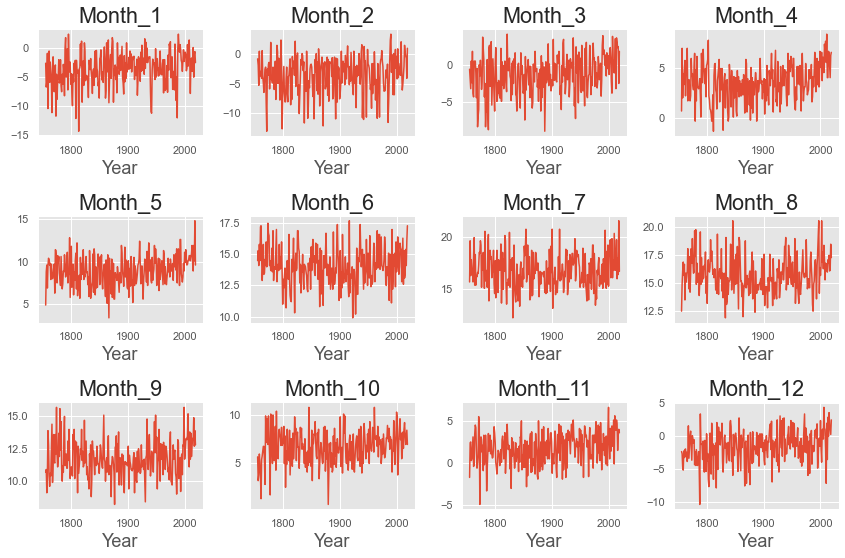

In [13]:
_,axs = plt.subplots(3,4)
axs = axs.ravel()
for i, month in enumerate(months):
    temp[month].plot(ax = axs[i], title = month)
    plt.tight_layout()

## Média Móvel de Temperaturas Anuais
---
Podemos obervar um mudança na tendência da média d temperatura a partir do no 2000.


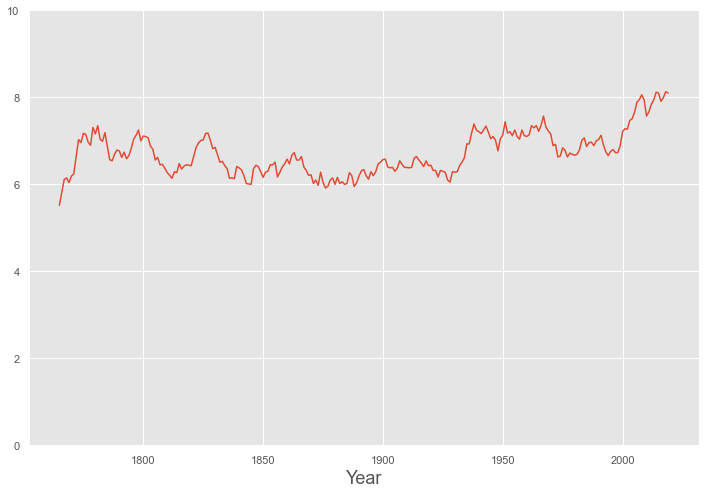

In [11]:
temp['Mean'].rolling(window=10, min_periods=10).mean().plot(ylim=(0,10))

In [14]:
temp['Time-Era'] = temp.index.map(lambda x: 'Before 1900s' if x < 1900 else 'After 1900s')

In [15]:
temp.sample(10)

,Month_1,Month_2,Month_3,Month_4,Month_5,Month_6,Month_7,Month_8,Month_9,Month_10,Month_11,Month_12,Mean,Time-Era
Year,,,,,,,,,,,,,,
1857,-5.9,-0.9,-0.7,2.1,8.4,13.3,16.2,19.1,13.0,9.3,2.6,2.7,8.3,Before 1900s
1936,-1.6,-5.1,0.3,3.2,9.3,17.4,18.4,16.2,10.9,4.6,3.6,2.7,6.3,After 1900s
1770,-4.9,-2.2,-8.3,3.0,9.2,14.1,16.6,17.4,13.6,9.9,0.0,-1.7,7.9,Before 1900s
1898,0.9,-2.2,-1.3,1.9,8.7,13.9,14.8,14.9,11.4,6.0,3.5,0.1,6.9,Before 1900s
1788,-3.9,-7.7,-6.2,3.9,8.8,15.4,19.0,15.1,13.6,4.2,1.2,-10.4,6.3,Before 1900s
1897,-5.2,-4.2,-1.8,3.7,10.2,15.1,17.2,17.2,11.3,6.4,1.5,0.3,6.4,Before 1900s
1996,-4.0,-6.9,-1.5,5.6,7.6,14.1,15.1,19.1,10.5,8.3,3.2,-3.2,7.4,After 1900s
1767,-11.1,-6.5,-1.1,1.7,8.5,13.4,15.4,18.1,14.4,6.7,4.2,-2.9,8.4,Before 1900s
1997,-2.3,-0.5,1.6,3.1,8.2,15.1,18.6,20.6,12.8,4.8,2.1,-0.5,6.5,After 1900s


## Densidades das temperaturas antes e após 1900
---
O aumento ds temperaturas no quadrante após 1900 se confirma e pode ser obeservado no quadro baixo.

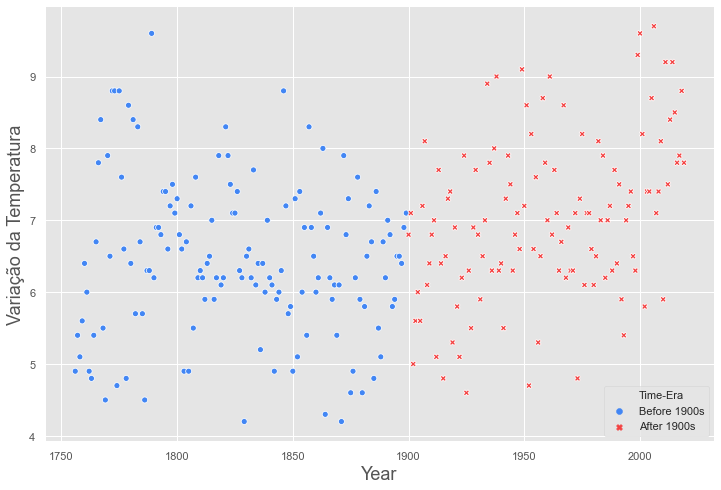

In [18]:
# https://seaborn.pydata.org/generated/seaborn.scatterplot.html
axs = sns.scatterplot(x = temp.index, y=temp['Mean'], hue='Time-Era', style='Time-Era', palette=pallete, data=temp);
axs.set_ylabel('Variação da Temperatura');
axs.legend(loc='lower right');

In [19]:
temp['Century'] = (temp.index.map(lambda x: x//100 + 1))
temp.sample(10)

,Month_1,Month_2,Month_3,Month_4,Month_5,Month_6,Month_7,Month_8,Month_9,Month_10,Month_11,Month_12,Mean,Time-Era,Century
Year,,,,,,,,,,,,,,,
1922,-5.7,-4.5,-1.5,1.6,9.7,14.0,15.3,14.1,10.6,4.3,0.5,-0.5,5.1,After 1900s,20
1999,-2.3,-2.4,0.7,6.6,8.9,16.0,19.2,16.4,15.7,7.8,4.3,-1.6,9.3,After 1900s,20
1790,0.0,1.5,2.3,0.1,9.9,12.8,13.9,14.9,11.2,6.0,1.4,-1.1,6.2,Before 1900s,18
1913,-3.2,-0.5,1.8,4.7,9.5,13.4,16.0,15.2,11.5,7.0,4.6,-2.1,7.7,After 1900s,20
1965,-2.0,-4.7,-1.4,3.2,7.4,14.2,14.0,14.0,12.7,7.8,-1.6,-4.0,6.3,After 1900s,20
1828,-4.7,-5.2,-1.9,2.6,8.7,15.5,17.8,15.9,10.5,6.6,1.6,-3.9,6.2,Before 1900s,19
1844,-5.0,-10.9,-4.6,4.7,9.4,12.0,13.4,14.4,11.7,6.2,0.1,-3.9,6.0,Before 1900s,19
1860,-1.8,-6.2,-2.7,3.4,7.4,14.3,16.4,15.2,11.5,5.4,1.0,-5.3,6.0,Before 1900s,19
1770,-4.9,-2.2,-8.3,3.0,9.2,14.1,16.6,17.4,13.6,9.9,0.0,-1.7,7.9,Before 1900s,18


## Média Por Século
---
Plotando os dados por século é possível verificar ainda mais claramente o aumento da temperatura no século 21.

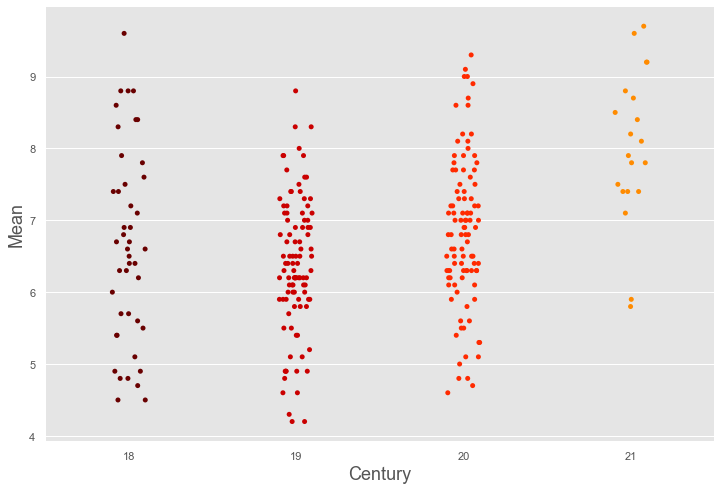

In [16]:
#https://seaborn.pydata.org/generated/seaborn.stripplot.html
with sns.color_palette('hot'):
    axs = sns.stripplot(x='Century', y='Mean', data=temp)

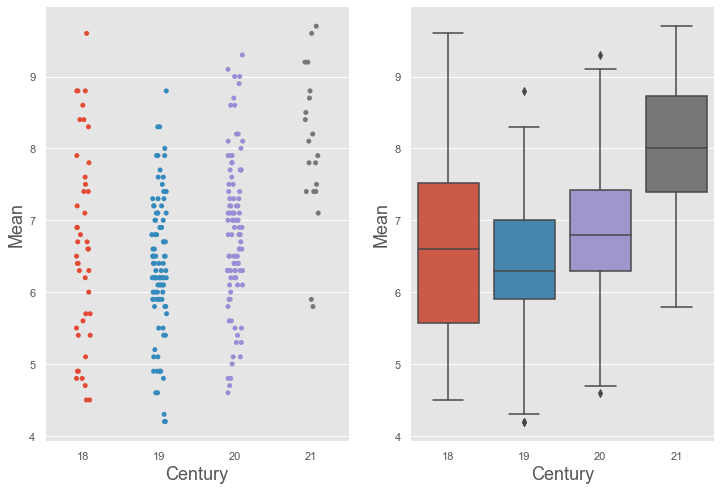

In [25]:
_, axs = plt.subplots(nrows=1, ncols=2)
sns.stripplot(x='Century', y='Mean', data=temp, ax=axs[0])
sns.boxplot(x='Century', y='Mean', data=temp, ax=axs[1])

In [33]:
temp.groupby('Century')['Mean'].mean()

Century
18    6.645455
19    6.370000
20    6.834000
21    8.020000
Name: Mean, dtype: float64

In [31]:
a = temp.groupby('Century')['Mean'].agg(['median','max','min','std'])
a

,median,max,min,std
Century,,,,
18,6.6,9.6,4.5,1.349497
19,6.3,8.8,4.2,0.941254
20,6.8,9.3,4.6,1.034869
21,8.0,9.7,5.8,1.061082


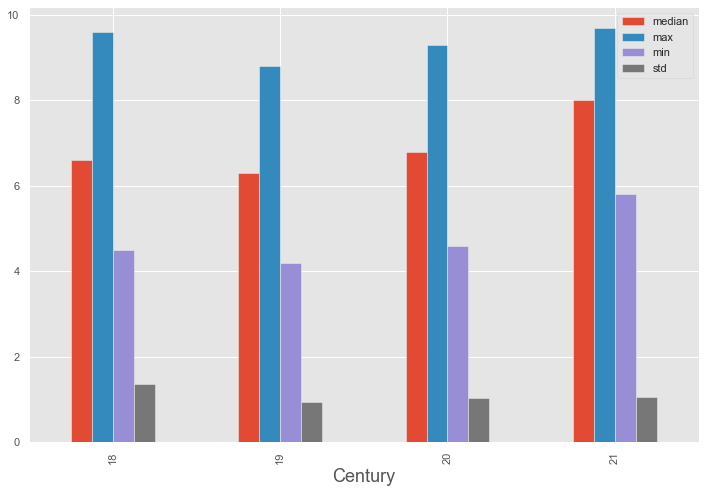

In [34]:
a.plot(kind='bar');


## Divisão do DataFram

In [20]:
before_1900 = temp[temp['Time-Era']=='Before 1900s']['Mean']
after_1900 = temp[temp['Time-Era']=='After 1900s']['Mean']

In [21]:
after_1900.sample(10)

Year
1968    6.2
2002    5.8
1919    5.3
1967    8.6
2010    5.9
1955    7.6
1964    7.1
1920    6.9
1999    9.3
1910    6.8
Name: Mean, dtype: float64

## Bootstrap de reamostragem

In [2]:
def permuted(data1,data2):
    data = np.concatenate((data1, data2))
    permuted_data = np.random.permutation(data)
    permuted_sample_1 = permuted_data[:len(data1)]
    permuted_sample_2 = permuted_data[len(data1):]
    return permuted_sample_1, permuted_sample_2

In [24]:
permuted(before_1900,after_1900)

(array([7.2, 4.9, 6.2, 9.2, 7.6, 7.9, 6.5, 6.3, 7.1, 5.8, 6.5, 7.7, 6.1,
        6.1, 6.8, 6.5, 7. , 4.2, 7.9, 8.1, 7.4, 6.5, 6. , 9.2, 7.7, 9.6,
        6.9, 6.3, 7.4, 7. , 6.1, 4.8, 7.1, 8. , 6.3, 5.4, 6.8, 7.1, 7. ,
        5. , 8.2, 8.9, 8.7, 4.2, 6.4, 4.5, 5.7, 6.3, 6.2, 8.3, 6.7, 6.3,
        6.8, 6.3, 6.9, 6.5, 6.5, 6.2, 7.1, 6.2, 9. , 4.6, 5.4, 6.6, 8.5,
        6.1, 6.5, 7.6, 4.9, 6.5, 7. , 6.3, 6.8, 8.1, 7.9, 6.2, 7.2, 6.8,
        7. , 6.7, 5.9, 6.2, 6.6, 7.2, 6.9, 8.8, 5.1, 4.9, 6.2, 6.5, 7. ,
        7.1, 4.7, 6.3, 5.4, 7.6, 6. , 6.7, 5.3, 6.4, 6. , 7.4, 8. , 8.7,
        5.6, 6.9, 7.9, 7.8, 7.1, 4.6, 7.1, 6.4, 5.9, 5.8, 6.9, 7.3, 6.4,
        8.8, 7. , 8.6, 6.1, 6. , 8.4, 4.8, 6.2, 8.8, 7.4, 6.8, 7. , 5.6,
        5.9, 5.9, 6.7, 7.3, 6.4, 4.9, 6.3, 8.1, 7.4, 4.3, 8.3, 6.2, 7.5,
        7.9]),
 array([9.6, 5.8, 6.2, 6.3, 7.7, 5.5, 4.6, 5.8, 7.5, 9. , 6.3, 6.3, 5.1,
        7.5, 5.9, 7.5, 7.2, 5.1, 4.8, 5.4, 8.8, 5.5, 9.1, 8.4, 7.1, 7.4,
        6.6, 7.1, 5.5, 5.7, 9.3, 6.4

In [34]:
def replicate(data1, data2, function, size=1):
    permuted_replicates =np.empty(size)
    
    for i in range(size):
        perm_sample_1,perm_sample_2 = permuted(data1,data2)
        permuted_replicates[i] = function(perm_sample_1,perm_sample_2)
    return permuted_replicates

## Replicação e mistura dos dados para uma simulação 10x

In [43]:
replicate(before_1900,after_1900,means_diff,10)

array([ 0.22916667, -0.06263889, -0.16347222,  0.04736111,  0.09777778,
        0.01069444,  0.12680556, -0.08402778,  0.05958333,  0.00611111])

In [30]:
def means_diff(data1, data2):
    diff =np.mean(data1) - np.mean(data2)
    return diff

In [42]:
#np.random.seed(13)
empirical_diff = round((np.mean(after_1900))-(np.mean(before_1900)),2)
f"The Diference in Mean is: {empirical_diff}C"

'The Diference in Mean is: 0.58C'

In [44]:
n_bootstrap = 10000

In [45]:
replicate = replicate(before_1900,after_1900,means_diff,size=n_bootstrap)


In [46]:
len(replicate)


10000

In [47]:
replicate

array([-0.01833333,  0.10083333, -0.00458333, ...,  0.05194444,
       -0.05347222, -0.12222222])

In [48]:
p = np.sum(replicate >= empirical_diff)/len(replicate)

In [50]:
f"The p-value for the test-statistic of {empirical_diff:.2f} is {p:.3f}"

'The p-value for the test-statistic of 0.58 is 0.000'

### Ao simular o processo estocástico 10.000 vezes em nenhuma a média de temperatura foi igual ou maior que a diferença das médias observardas no período. Sinal que realmente a temperatura observol uma alta no período.